In [2]:
import numpy as np
import sys
from os.path import join
from os import remove
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import pyntcloud # http://pyntcloud.readthedocs.io/en/latest/
DATA_DIR = '../../Stanford3dDataset_v1.2/Area_1/office_1'
%matplotlib notebook

In [3]:
def voxelize(points, voxel_size):
    '''
    input: 
        points - Nx6 array that represents x, y, z, r, g, b of each point in point cloud
        voxel_size - 3x1 array, each element represents voxel size along a given axis (x, y, z)
    returns:
        voxel_point_dict - dict of voxelID -> points, points represent as a 2D array of points
        voxel_labels - dict of voxelID -> voxel_coords, voxel_coords represented as (x, y, z) triple, top left of voxel
    '''
    
    voxel_labels = {}
    voxel_labels_reversed = {}
    voxel_point_dict = {}
    curr_voxel_label = 0
    
    for x, y, z, r, g, b in points:
        voxel_x_idx = x // voxel_size[0]
        voxel_y_idx = y // voxel_size[1]
        voxel_z_idx = z // voxel_size[2]
        
        voxel_x_coord = voxel_x_idx * voxel_size[0]
        voxel_y_coord = voxel_y_idx * voxel_size[1]
        voxel_z_coord = voxel_z_idx * voxel_size[2]
        
        voxel_coords = (voxel_x_coord, voxel_y_coord, voxel_z_coord)
        
        if voxel_coords in voxel_labels_reversed:
            voxel_idx = voxel_labels_reversed[voxel_coords]
        else:
            voxel_idx = curr_voxel_label
            curr_voxel_label += 1
            voxel_labels_reversed[voxel_coords] = voxel_idx
            voxel_labels[voxel_idx] = voxel_coords
            voxel_point_dict[voxel_idx] = []
        
        voxel_point_dict[voxel_idx].append([x, y, z, r, g, b])
        
    
    return voxel_point_dict, voxel_labels

In [4]:
def threshold_voxels(voxel_point_dict, min_pts):
    '''
    input:
        voxel_point_dict - dict of voxelID -> points, points represent as a 2D array of points
        min_pts - minimum number of points in a voxel to keep any points from that voxel
    output:
        filtered_points - N' x 6 array, represents the points remaining after filtering
        points_removed - (N - N') x 6, represents points removed by filtering
    '''
    
    filtered_points = np.vstack([voxel_point_dict[k] for k in voxel_point_dict.keys() if len(voxel_point_dict[k]) >= min_pts])
    removed_points = np.vstack([voxel_point_dict[k] for k in voxel_point_dict.keys() if len(voxel_point_dict[k]) < min_pts])
    return filtered_points, removed_points

In [5]:
def clean_points(points, voxel_size, min_pts_per_voxel):
    voxel_pt_dict, voxel_labels = voxelize(points, voxel_size)
    return threshold_voxels(voxel_pt_dict, min_pts_per_voxel)

In [8]:
xyzrgb = np.loadtxt(join(DATA_DIR, 'Annotations/chair_3.txt')) # load sample data

cleaning data takes 0.05587887763977051 seconds

plotting cleaned xyzrgb:


<IPython.core.display.Javascript object>


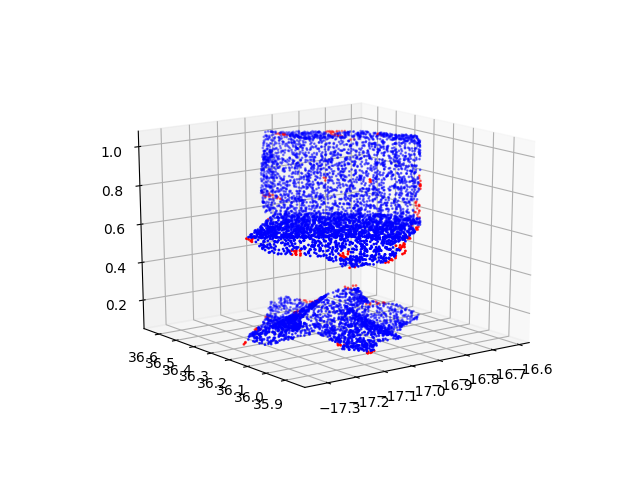

Plotting 7082 points takes 0.029521703720092773 seconds.


In [9]:
# some test code
start = time.time()
new_xyzrgb, rem_xyzrgb = clean_points(xyzrgb, [0.1, 0.1, 0.1], 15)
print('cleaning data takes {} seconds'.format(time.time() - start))

print()
print('plotting cleaned xyzrgb:')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
start = time.time()
skip_factor = 1
ax.scatter(new_xyzrgb[::skip_factor, 0], new_xyzrgb[::skip_factor, 1], new_xyzrgb[::skip_factor, 2], s = 1, color='b')
ax.scatter(rem_xyzrgb[::skip_factor, 0], rem_xyzrgb[::skip_factor, 1], rem_xyzrgb[::skip_factor, 2], s = 1, color='r')
plt.show()
print('Plotting {} points takes {} seconds.'.format(int(new_xyzrgb.shape[0]/skip_factor), time.time()-start))